## Comparing NumPy Sum vs Manual Loop

This code compares how fast NumPy's built-in sum function works compared to a regular Python `for` loop.



1. **Creates 10 million random numbers** using `np.random.rand()`.
2. Uses **NumPy's built-in sum** function:
   - `np.sum(data)` is fast and optimized (called **vectorized**).
3. Uses a **manual `for` loop** to add each number:
   - Slower, because it adds one by one.
4. **Measures time** for both methods using `time.time()`.
5. Finally, it **prints the total sum and time taken** for each method.



 **NumPy** is usually much faster than a manual loop for large data.


In [1]:
import numpy as np
import time


size = 10000000
data = np.random.rand(size)

start_np = time.time()
np_sum = np.sum(data)
end_np = time.time()
start_py = time.time()
manual_sum = 0
for val in data:
    manual_sum += val
end_py = time.time()

print(f"NumPy Sum: {np_sum:.2f} | Time: {end_np - start_np:.5f} sec")
print(f"Manual Sum: {manual_sum:.2f} | Time: {end_py - start_py:.5f} sec")


NumPy Sum: 4998669.58 | Time: 0.02741 sec
Manual Sum: 4998669.58 | Time: 6.26338 sec


## Upgrading pip in Jupyter Notebook

This command is used to **update pip** (Python's package installer) to the latest version.


In [2]:
!python -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 751.0 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 852.5 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 960.5 kB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 992.5 kB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 1.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.1
    Uninstalling pip-25.1:
      Successfully uninstalled pip-25.1


## Web Scraping Multiple Blog Pages with Python 🕸️

This script scrapes blog posts from multiple URLs and extracts their title and content.

### • Libraries Used:
- `requests` → to fetch page content
- `BeautifulSoup` → to parse HTML
- `pandas` → to store data
- `time.sleep()` → to avoid sending too many requests too quickly

### • What the Code Does:
1. Loops through a list of blog URLs.
2. Sends a GET request for each page.
3. Extracts:
   - The **post title**
   - The **main article text** from `<p>` tags
4. Skips pages with missing or very short content.
5. Saves all results in a pandas **DataFrame** for later use.

Great for collecting and analyzing blog post content automatically.


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

urls = [
    'https://techncruncher.blogspot.com/2025/01/top-10-ai-tools-that-will-transform.html',
    'https://techncruncher.blogspot.com/2023/12/limewire-ai-studio-review-2023-details.html',
    'https://techncruncher.blogspot.com/2023/01/top-10-ai-tools-in-2023-that-will-make.html',
    'https://techncruncher.blogspot.com/2022/11/top-10-ai-content-generator-writer.html',
    'https://techncruncher.blogspot.com/2022/09/cj-affiliate-ultimate-guide-to.html'
]

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
articles = []

for url in urls:
    try:
        res = requests.get(url, headers=headers, timeout=10)
        res.raise_for_status()
        soup = BeautifulSoup(res.content, 'lxml')

        title = soup.find('h3', class_='post-title')
        title = title.get_text(strip=True) if title else soup.title.get_text(strip=True)

        content_div = soup.find('div', class_='post-body entry-content')
        if not content_div:
            print(f"[SKIP] No content: {url}")
            continue

        paragraphs = content_div.find_all('p')
        text = ' '.join(p.get_text(strip=True) for p in paragraphs)

        if len(text) > 100:
            articles.append({'url': url, 'title': title, 'text': text})
        else:
            print(f"[SKIP] Too short: {url}")

        time.sleep(1)
    except Exception as e:
        print(f"[ERROR] {url} -> {e}")

df = pd.DataFrame(articles)
df.head()


[SKIP] Too short: https://techncruncher.blogspot.com/2022/09/cj-affiliate-ultimate-guide-to.html


,url,title,text
0,https://techncruncher.blogspot.com/2025/01/top...,Top 10 AI Tools That Will Transform Your Conte...,Looking to level up your content creation gam...
1,https://techncruncher.blogspot.com/2023/12/lim...,"LimeWire AI Studio Review 2023: Details, Prici...",In the rapidly advancing landscape of AI tech...
2,https://techncruncher.blogspot.com/2023/01/top...,Top 10 AI Tools in 2023 That Will Make Your Li...,"In this article, we explore the top 10 AI too..."
3,https://techncruncher.blogspot.com/2022/11/top...,Top 10 AI Content Generator & Writer Tools in ...,There are a number of different AI content ...


## Extracting Text Features with spaCy

This code uses the **spaCy NLP library** to analyze blog content.
- Loads the small English language model: `en_core_web_sm`
- Defines a function to extract features from each article:
  - **Number of tokens** (words & punctuation)
  - **Number of sentences**
  - **Named entities** (like names, places, etc.)
  - **Number of nouns**
- Applies this function to each row in the DataFrame
- Adds extracted features as new columns
- Also adds a new column for the **length of each article title**

Useful for analyzing the structure of written content.


In [21]:
!pip install spacy


In [22]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.6 MB/s eta 0:00:08
     --- ------------------------------------ 1.0/12.8 MB 2.0 MB/s eta 0:00:06
     ---- ----------------------------------- 1.3/12.8 MB 1.9 MB/s eta 0:00:07
     ---- ----------------------------------- 1.6/12.8 MB 1.8 MB/s eta 0:00:07
     ----- ---------------------------------- 1.8/12.8 MB 1.7 MB/s eta 0:00:07
     ------ --------------------------------- 2.1/12.8 MB 1.6 MB/s eta 0:00:07
     ------- -------------------------------- 2.4/12.8 MB 1.4 MB/s eta 0:00:08
     ------- -------------------------------- 2.4/12.8 MB 1.4 MB/s eta 0:00:08
     -------- ------------------------------- 2.6/12.8 MB 1.4 MB/s eta 0:00:08
     --------- ------------------------------ 2.9/12.8 MB 1.3 MB/s eta 0:00:08
     --------- ------------------------------ 3.1/12.8 MB 1.3 MB/s

In [24]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_features(text):
    doc = nlp(text)
    return pd.Series({
        'num_tokens': len(doc),
        'num_sentences': len(list(doc.sents)),
        'num_entities': len(doc.ents),
        'num_nouns': len([t for t in doc if t.pos_ == 'NOUN'])
    })

if not df.empty:
    features = df['text'].apply(extract_features)
    df = pd.concat([df, features], axis=1)
    df['title_length'] = df['title'].apply(len)
else:
    print("⚠️ No articles found.")


## Visualizing Article Lengths

This code plots a histogram using **Seaborn** and **Matplotlib** to show how long each article is based on the number of tokens (words and punctuation).

### What the plot shows:
- **X-axis** → Token count in each article
- **Y-axis** → Number of articles with that token count
- Includes a smooth **KDE curve** to show the distribution pattern.

 Helps you understand how long your articles usually are.


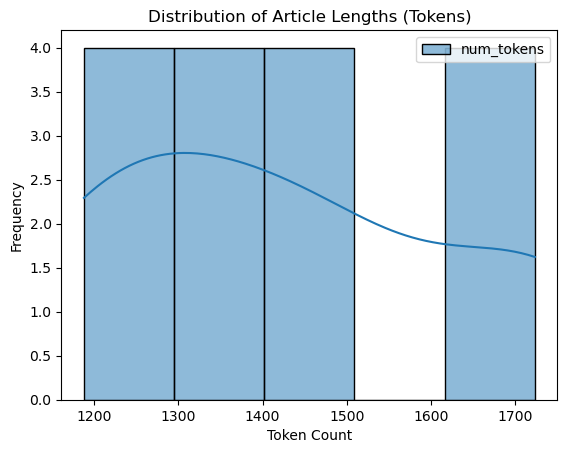

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

if not df.empty:
    sns.histplot(df['num_tokens'], kde=True)
    plt.title("Distribution of Article Lengths (Tokens)")
    plt.xlabel("Token Count")
    plt.ylabel("Frequency")
    plt.show()

In [30]:
print(df.columns)


Index(['url', 'title', 'text', 'num_tokens', 'num_sentences', 'num_entities',
       'num_nouns', 'title_length', 'num_tokens', 'num_sentences',
       'num_entities', 'num_nouns'],
      dtype='object')


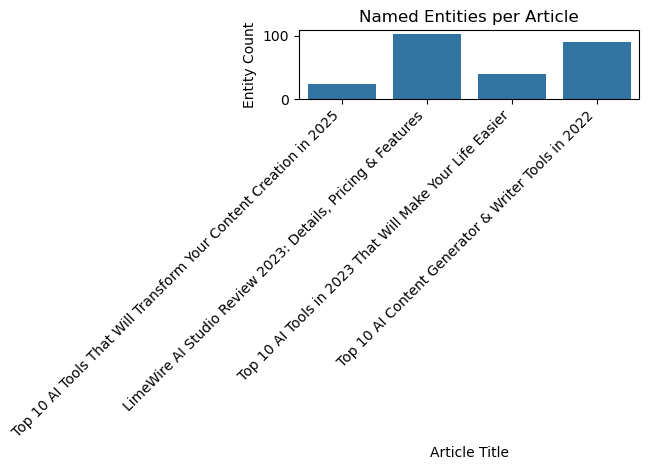

In [32]:

df = df.loc[:, ~df.columns.duplicated()]

import seaborn as sns
import matplotlib.pyplot as plt

if not df.empty and 'num_entities' in df.columns:
    sns.barplot(x='title', y='num_entities', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title("Named Entities per Article")
    plt.ylabel("Entity Count")
    plt.xlabel("Article Title")
    plt.tight_layout()
    plt.show()
else:
    print("❌ DataFrame is empty or missing 'num_entities'.")


C:\Users\HS TRADER\AppData\Local\Temp\ipykernel_1176\693350729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['noun_density'] = df['num_nouns'] / df['num_tokens']


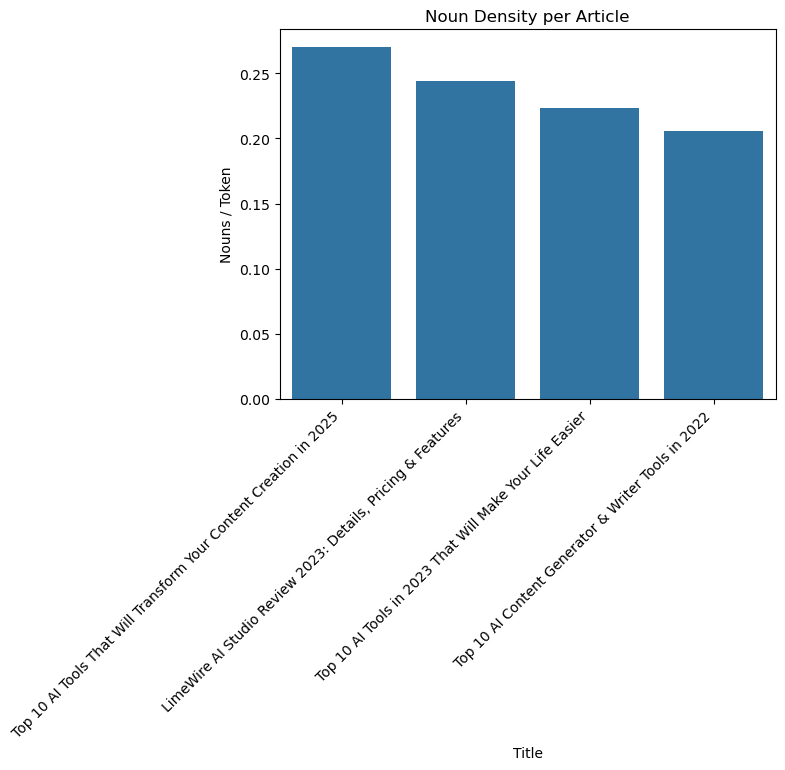

In [33]:
if not df.empty:
    df['noun_density'] = df['num_nouns'] / df['num_tokens']
    sns.barplot(x='title', y='noun_density', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title("Noun Density per Article")
    plt.ylabel("Nouns / Token")
    plt.xlabel("Title")
    plt.show()


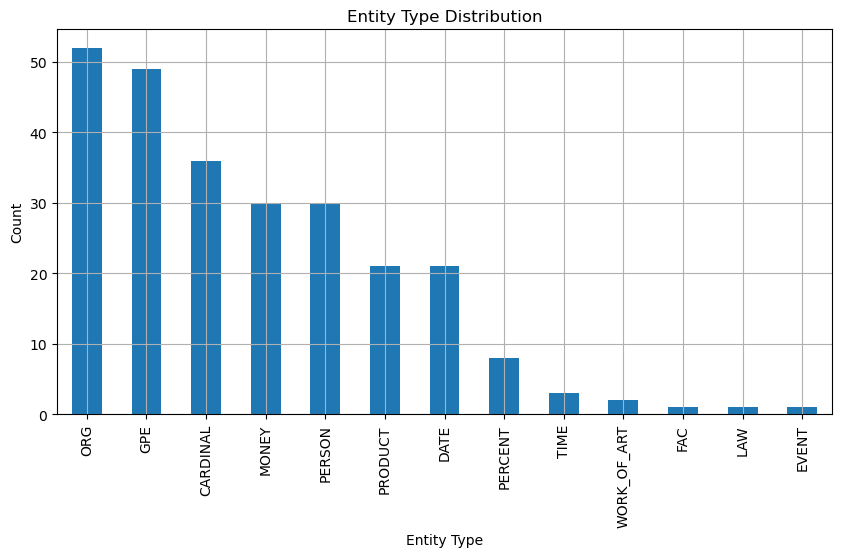

In [34]:
from collections import Counter

all_entities = []
for text in df['text']:
    doc = nlp(text)
    all_entities.extend([ent.label_ for ent in doc.ents])

entity_counts = Counter(all_entities)
entity_df = pd.DataFrame.from_dict(entity_counts, orient='index', columns=['count']).sort_values('count', ascending=False)

if not entity_df.empty:
    entity_df.plot(kind='bar', figsize=(10,5), legend=False)
    plt.title("Entity Type Distribution")
    plt.ylabel("Count")
    plt.xlabel("Entity Type")
    plt.grid(True)
    plt.show()


In [37]:
pip install textblob



   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 1.8 MB/s eta 0:00:00


C:\Users\HS TRADER\AppData\Local\Temp\ipykernel_1176\329863033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)


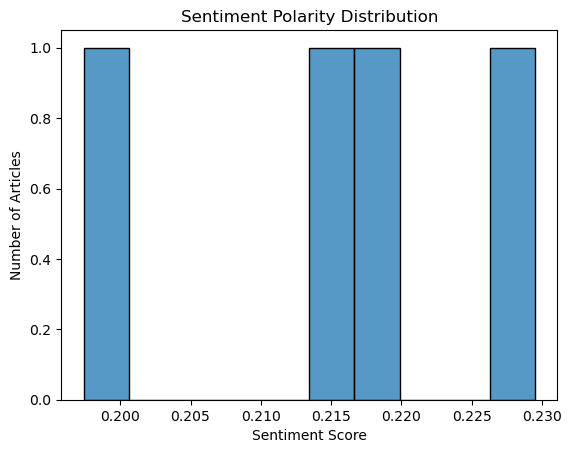

In [38]:
from textblob import TextBlob

df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['sentiment'], bins=10)
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Articles")
plt.show()


In [39]:
df[['title', 'title_length', 'num_tokens', 'num_sentences', 'num_entities', 'num_nouns', 'noun_density', 'sentiment']]


,title,title_length,num_tokens,num_sentences,num_entities,num_nouns,noun_density,sentiment
0,Top 10 AI Tools That Will Transform Your Conte...,65,1188,47,24,321,0.270202,0.229493
1,"LimeWire AI Studio Review 2023: Details, Prici...",59,1723,65,103,420,0.243761,0.219387
2,Top 10 AI Tools in 2023 That Will Make Your Li...,55,1480,52,39,331,0.223649,0.197417
3,Top 10 AI Content Generator & Writer Tools in ...,50,1319,63,89,271,0.205459,0.214853


In [40]:
!pip install scikit-learn

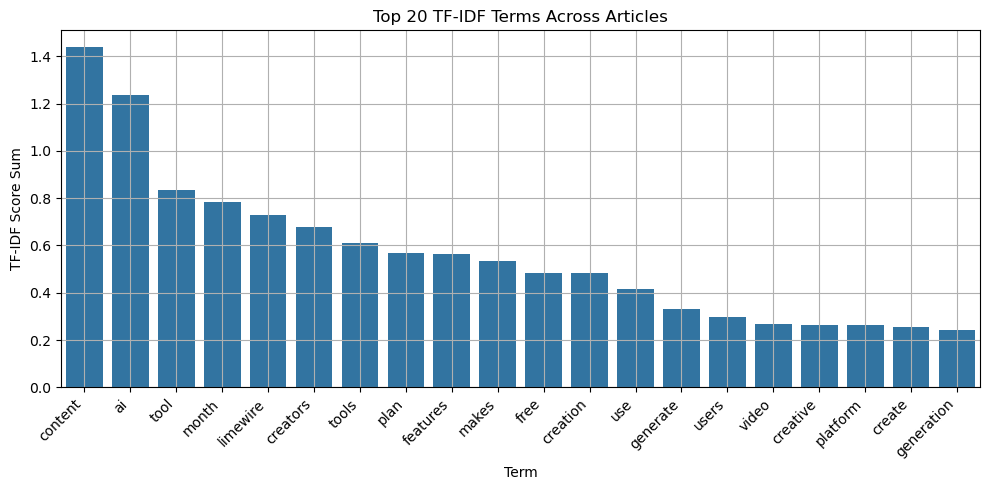

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

X = vectorizer.fit_transform(df['text'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


tfidf_sums = tfidf_df.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=tfidf_sums.index, y=tfidf_sums.values)
plt.title("Top 20 TF-IDF Terms Across Articles")
plt.ylabel("TF-IDF Score Sum")
plt.xlabel("Term")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()
